In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator

%matplotlib inline

# Загрузка датасета

In [3]:
df = pd.read_csv('data.csv', header=None)

# Разделение датасета на X и y, а также на тренировочную и тестовую части

In [4]:
X = df.drop(df.columns[1], axis=1)
y = df[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
X_train

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
78,8610862,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,...,23.37,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
330,896839,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,...,18.76,21.98,124.30,1070.0,0.14350,0.44780,0.49560,0.19810,0.3019,0.09124
378,9013594,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,...,14.54,19.64,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638
213,881094802,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,18.07,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818
89,861598,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,...,16.34,18.24,109.40,803.6,0.12770,0.30890,0.26040,0.13970,0.3151,0.08473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,854941,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,905686,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,9112594,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,911654,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [6]:
X_train.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,3.431541e+07,14.126503,19.438241,91.904422,655.325377,0.095857,0.102648,0.088497,0.048535,0.181364,...,16.296593,25.920905,107.401181,883.117588,0.132163,0.252406,0.273916,0.114698,0.291131,0.083861
std,1.341596e+08,3.553198,4.322444,24.447698,353.683472,0.014401,0.053486,0.081168,0.039323,0.027124,...,4.852525,6.114636,33.710958,566.874169,0.023796,0.157509,0.210876,0.066494,0.064191,0.018232
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692825e+05,11.672500,16.330000,75.007500,416.450000,0.085088,0.062660,0.029500,0.019672,0.162275,...,12.980000,21.572500,83.922500,513.925000,0.114725,0.143450,0.117250,0.064342,0.251100,0.071135
50%,9.070115e+05,13.355000,19.030000,86.365000,548.750000,0.095150,0.090945,0.059640,0.033300,0.179800,...,14.975000,25.480000,97.735000,684.550000,0.131100,0.211850,0.229000,0.099425,0.282000,0.080065
75%,8.911121e+06,15.832500,21.862500,104.175000,790.575000,0.104825,0.129550,0.132050,0.070582,0.195300,...,19.152500,30.272500,126.600000,1123.250000,0.146650,0.336450,0.385900,0.162450,0.318500,0.091865
max,9.113205e+08,28.110000,39.280000,188.500000,2499.000000,0.163400,0.345400,0.426800,0.201200,0.290600,...,33.130000,49.540000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 78 to 129
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    int64  
 1   2       398 non-null    float64
 2   3       398 non-null    float64
 3   4       398 non-null    float64
 4   5       398 non-null    float64
 5   6       398 non-null    float64
 6   7       398 non-null    float64
 7   8       398 non-null    float64
 8   9       398 non-null    float64
 9   10      398 non-null    float64
 10  11      398 non-null    float64
 11  12      398 non-null    float64
 12  13      398 non-null    float64
 13  14      398 non-null    float64
 14  15      398 non-null    float64
 15  16      398 non-null    float64
 16  17      398 non-null    float64
 17  18      398 non-null    float64
 18  19      398 non-null    float64
 19  20      398 non-null    float64
 20  21      398 non-null    float64
 21  22      398 non-null    float64
 22  2

# Визуализация данных

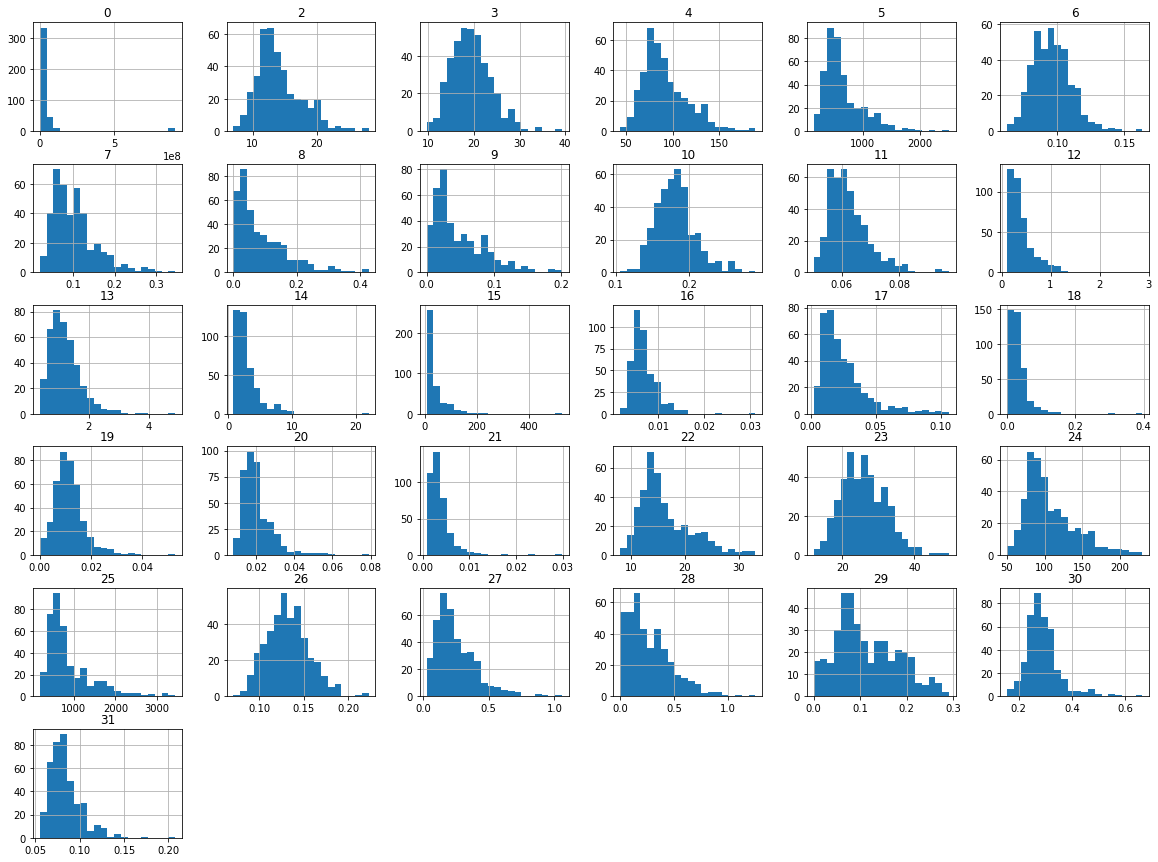

In [8]:
X_train.hist(bins=20, figsize=(20,15))
None

# Нормалиация данных

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.19183803,  1.70581999,  1.04974466, ...,  2.04939907,
         3.94428119,  0.86655367],
       [-0.24940927,  0.53638811, -0.90994477, ...,  1.25584994,
         0.16797759,  0.40524244],
       [-0.18883236, -0.13145612, -0.99333581, ..., -0.14001353,
         0.74198821,  0.68752098],
       ...,
       [-0.1880935 , -0.31743806,  1.31844912, ..., -0.835536  ,
        -0.944168  , -1.15058462],
       [-0.2492987 ,  0.02071092,  0.25289695, ...,  0.28913543,
        -0.58853098, -0.2900195 ],
       [-0.2496344 ,  1.59592158,  1.3161327 , ...,  0.88090926,
         0.61408367,  0.04333279]])

# Поиск выбросов

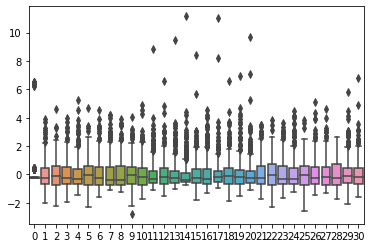

In [10]:
sns.boxplot(data=X_train_scaled)
None

## Фильтр для выбросов

Заменим выбросы на nan

In [11]:
def filtr_data_dump(data):
    for attr in data:
        q25, q75 = np.percentile(attr, [25, 75])
        delta_q = q75 - q25
        max = q75 + (1.5 * delta_q)
        min = q25 - (1.5 * delta_q)
        attr[attr < min] = np.nan
        attr[attr > max] = np.nan
    return data

class FiltrOutlier(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return filtr_data_dump(X)

In [12]:
filtr = FiltrOutlier()
X_train_scaled = filtr.fit_transform(X_train_scaled)
sum(np.isnan(X_train_scaled))

array([19,  1, 52,  1,  1, 41,  3,  0,  0, 38, 18,  6, 41,  6,  2, 39, 11,
        8,  8, 36,  9,  1, 50,  0,  0, 31,  4,  5,  0, 36, 10])

Так как выбросов много, то попробуем заменить пропуски на среднее значение каждого столбца соответсвенно

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_train_imputed

array([[-0.19183803,  1.70581999,  1.04974466, ...,  2.04939907,
         3.94428119,  0.86655367],
       [-0.24940927,  0.53638811, -0.90994477, ...,  1.25584994,
         0.16797759,  0.40524244],
       [-0.18883236, -0.13145612, -0.99333581, ..., -0.14001353,
        -0.07169477, -0.03573923],
       ...,
       [-0.1880935 , -0.31743806, -0.09253048, ..., -0.835536  ,
        -0.944168  , -1.15058462],
       [-0.2492987 ,  0.02071092,  0.25289695, ...,  0.28913543,
        -0.58853098, -0.2900195 ],
       [-0.2496344 ,  1.59592158,  1.3161327 , ...,  0.88090926,
         0.61408367,  0.04333279]])

In [14]:
sum(np.isnan(X_train_imputed))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

# Поиск связей

In [15]:
X_train_df = pd.DataFrame(X_train_imputed)
corr_matrix = X_train_df.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.000000,0.108219,0.135824,0.113124,0.097122,0.118894,0.148620,0.099384,0.136868,0.091098,...,0.135291,0.103852,0.135029,0.125221,0.133235,0.141539,0.116020,0.156652,0.166153,0.081105
1,0.108219,1.000000,0.416567,0.997752,0.988098,0.241116,0.496777,0.644367,0.815396,0.163865,...,0.968660,0.375605,0.962377,0.942177,0.166976,0.397592,0.497213,0.727559,0.148670,-0.006445
2,0.135824,0.416567,1.000000,0.428006,0.406947,0.181502,0.380078,0.402438,0.424197,0.209904,...,0.459804,0.848126,0.474997,0.447323,0.207919,0.390982,0.400108,0.407960,0.243580,0.193300
3,0.113124,0.997752,0.428006,1.000000,0.986896,0.280259,0.546079,0.686373,0.845512,0.203960,...,0.969046,0.386282,0.968522,0.942549,0.200970,0.442476,0.536699,0.756049,0.180689,0.038277
4,0.097122,0.988098,0.406947,0.986896,1.000000,0.245237,0.491455,0.653211,0.818007,0.167144,...,0.960294,0.359554,0.954070,0.955922,0.168542,0.377268,0.483280,0.705780,0.132431,-0.002527
5,0.118894,0.241116,0.181502,0.280259,0.245237,1.000000,0.678160,0.613364,0.618049,0.589121,...,0.291882,0.246698,0.324911,0.279462,0.772505,0.562958,0.552438,0.583294,0.522652,0.536180
6,0.148620,0.496777,0.380078,0.546079,0.491455,0.678160,1.000000,0.882808,0.830871,0.622791,...,0.538121,0.374599,0.595407,0.513737,0.622602,0.871236,0.833311,0.824003,0.539203,0.680807
7,0.099384,0.644367,0.402438,0.686373,0.653211,0.613364,0.882808,1.000000,0.913773,0.583788,...,0.660091,0.374900,0.705536,0.646759,0.507053,0.767272,0.886578,0.848325,0.464411,0.537919
8,0.136868,0.815396,0.424197,0.845512,0.818007,0.618049,0.830871,0.913773,1.000000,0.509373,...,0.828666,0.406984,0.856614,0.809929,0.505362,0.677633,0.753737,0.906293,0.419093,0.379068
9,0.091098,0.163865,0.209904,0.203960,0.167144,0.589121,0.622791,0.583788,0.509373,1.000000,...,0.217514,0.235403,0.260890,0.206972,0.510858,0.558992,0.537913,0.482813,0.676721,0.519065


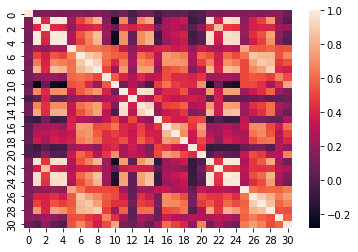

In [16]:
sns.heatmap(corr_matrix)
None

# Снизим размерность датасета

In [17]:
pca = PCA(n_components=0.95)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train_df))
X_train_reduced

,0,1,2,3,4,5,6,7,8,9,10,11
0,10.286030,2.908038,1.107423,1.105394,-1.065025,2.016990,0.837708,-1.331548,-0.878383,1.386114,-0.153449,-0.742274
1,1.906539,-0.019195,-1.424493,-1.702477,0.178627,-0.111541,0.101006,-0.308634,0.375718,0.465499,0.279314,-0.321841
2,-1.699497,0.112386,-0.961981,-1.549247,0.270859,0.602161,-0.128770,0.617474,0.195203,0.833550,-0.010334,-0.113686
3,1.577503,-1.388761,1.075232,1.034010,0.300581,-0.047082,0.984449,0.312782,-0.493491,-0.446300,0.208900,0.173393
4,1.360992,0.894640,0.711152,-0.415651,0.064631,1.056328,0.221447,-0.324471,-0.152681,0.152390,-0.100159,0.346726
...,...,...,...,...,...,...,...,...,...,...,...,...
393,-3.657118,-1.641372,0.644640,-0.481263,0.405970,-0.489678,0.691105,-0.280079,-0.192895,-1.043441,-0.361851,0.251340
394,-1.719665,1.113793,0.311698,1.317860,-0.539253,0.088597,0.757106,0.166937,0.327493,0.858252,0.124216,0.398256
395,-3.214771,-1.704885,-0.000710,0.585621,0.184986,-0.411224,0.242163,-0.281725,-0.253691,0.434441,0.081932,-0.081013
396,-0.399841,-0.700775,-0.226071,-0.450707,1.535643,-0.130585,-0.195151,-0.367797,0.355649,-0.512861,0.347876,0.091277


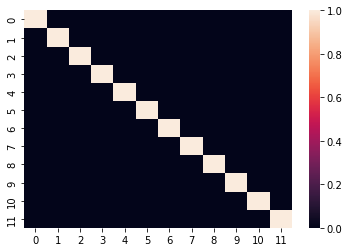

In [18]:
sns.heatmap(X_train_reduced.corr())
None

# Конвееры трансформации

In [20]:
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('filter_outlier', FiltrOutlier()),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('pca', PCA(n_components=0.95))
])
X_train_preproc = pd.DataFrame(pipeline.fit_transform(X_train))
X_train_preproc

,0,1,2,3,4,5,6,7,8,9,10,11
0,10.286030,2.908038,1.107423,1.105394,-1.065025,2.016990,0.837708,-1.331548,-0.878383,1.386114,-0.153449,-0.742274
1,1.906539,-0.019195,-1.424493,-1.702477,0.178627,-0.111541,0.101006,-0.308634,0.375718,0.465499,0.279314,-0.321841
2,-1.699497,0.112386,-0.961981,-1.549247,0.270859,0.602161,-0.128770,0.617474,0.195203,0.833550,-0.010334,-0.113686
3,1.577503,-1.388761,1.075232,1.034010,0.300581,-0.047082,0.984449,0.312782,-0.493491,-0.446300,0.208900,0.173393
4,1.360992,0.894640,0.711152,-0.415651,0.064631,1.056328,0.221447,-0.324471,-0.152681,0.152390,-0.100159,0.346726
...,...,...,...,...,...,...,...,...,...,...,...,...
393,-3.657118,-1.641372,0.644640,-0.481263,0.405970,-0.489678,0.691105,-0.280079,-0.192895,-1.043441,-0.361851,0.251340
394,-1.719665,1.113793,0.311698,1.317860,-0.539253,0.088597,0.757106,0.166937,0.327493,0.858252,0.124216,0.398256
395,-3.214771,-1.704885,-0.000710,0.585621,0.184986,-0.411224,0.242163,-0.281725,-0.253691,0.434441,0.081932,-0.081013
396,-0.399841,-0.700775,-0.226071,-0.450707,1.535643,-0.130585,-0.195151,-0.367797,0.355649,-0.512861,0.347876,0.091277


# Реализация многослойного перцептрона

In [ ]:
class FtMLP:
    def __init__(self, hidden_units, n_classes, f_activation='relu'):
        self._activation_dict = {'logistic': self._logistic_activation, 'tanh': self._tanh_activation, 'relu': self._relu_activation}
        self._f_activation = self._activation_dict[f_activation]
        self.hidden_layers = len(hidden_units)
        self.hidden_units = hidden_units
        self.n_classes = n_classes

    def _logistic_activation(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def _tanh_activation(self, z):
        return np.tanh(z)

    def _relu_activation(self, z):
        return np.max(0, z)